In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import plotly.express as px
import pandas as pd
import sqlite3


##Se inicia la carga de datos##
df_2017 = pd.read_csv('Titulados_Educacion_Superior_2017.csv', delimiter=';')
df_2018 = pd.read_csv('Titulados_Educacion_Superior_2018.csv', delimiter=';')
df_2019 = pd.read_csv('Titulados_Educacion_Superior_2019.csv', delimiter=';')
df_2020 = pd.read_csv('Titulados_Educacion_Superior_2020.csv', delimiter=';')
df_bd = pd.read_excel('base_indices_2017_2021.xlsx')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning:

Columns (2,5,21,34) have mixed types.Specify dtype option on import or set low_memory=False.

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning:

Columns (2,5) have mixed types.Specify dtype option on import or set low_memory=False.



In [55]:
##  Se concatenan los dataframe del 2017 al 2020 'Titulados Educación superior'  ##
action_concat = [df_2017, df_2018, df_2019, df_2020]
df_allYears = pd.concat(action_concat)

In [56]:
## Información general de las columnas del dataset concatenado ##
df_allYears.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 935597 entries, 0 to 199033
Data columns (total 40 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   cat_periodo              935597 non-null  object
 1   codigo_unico             935597 non-null  object
 2   MRUN                     935597 non-null  object
 3   GEN_ALU                  935597 non-null  int64 
 4   FEC_NAC_ALU              935597 non-null  int64 
 5   EDAD_ALU                 935597 non-null  object
 6   rango_edad               935597 non-null  object
 7   AÑO_ING_PRI_AÑO          935597 non-null  int64 
 8   SEM_ING_PRI_AÑO          935597 non-null  object
 9   AÑO_ING_CARR             935597 non-null  object
 10  SEM_ING_CARR             935597 non-null  object
 11  nomb_titulo_obtenido     935597 non-null  object
 12  nomb_grado_obtenido      935597 non-null  object
 13  FECHA_OBTENCION_TITULO   935597 non-null  int64 
 14  tipo_inst_1         

In [57]:
## Mostrar 5 primeras filas del dataset concatenado ##

df_allYears.head()

,cat_periodo,codigo_unico,MRUN,GEN_ALU,FEC_NAC_ALU,EDAD_ALU,rango_edad,AÑO_ING_PRI_AÑO,SEM_ING_PRI_AÑO,AÑO_ING_CARR,...,provincia_sede,comuna_sede,jornada,modalidad,version,tipo_plan_carr,AREA_CINEUNESCO,oecd_area,oecd_subarea,AREA_CARRERA_GENERICA_N
0,TIT_2017,I100S10C10J1V1,5073113,2,198304,34,30 A 34 AÑOS,2013,1,,...,MAGALLANES,PUNTA ARENAS,DIURNO,PRESENCIAL,1,PLAN REGULAR,TECNOLOGÍA,SERVICIOS,SERVICIOS DE SEGURIDAD,INGENIERÍA EN PREVENCIÓN DE RIESGOS
1,TIT_2017,I100S10C10J1V1,5428405,1,198211,34,30 A 34 AÑOS,2013,1,,...,MAGALLANES,PUNTA ARENAS,DIURNO,PRESENCIAL,1,PLAN REGULAR,TECNOLOGÍA,SERVICIOS,SERVICIOS DE SEGURIDAD,INGENIERÍA EN PREVENCIÓN DE RIESGOS
2,TIT_2017,I100S10C10J1V1,6006854,2,199410,22,20 A 24 AÑOS,2013,1,,...,MAGALLANES,PUNTA ARENAS,DIURNO,PRESENCIAL,1,PLAN REGULAR,TECNOLOGÍA,SERVICIOS,SERVICIOS DE SEGURIDAD,INGENIERÍA EN PREVENCIÓN DE RIESGOS
3,TIT_2017,I100S10C10J1V1,6553554,2,199101,26,25 A 29 AÑOS,2010,1,,...,MAGALLANES,PUNTA ARENAS,DIURNO,PRESENCIAL,1,PLAN REGULAR,TECNOLOGÍA,SERVICIOS,SERVICIOS DE SEGURIDAD,INGENIERÍA EN PREVENCIÓN DE RIESGOS
4,TIT_2017,I100S10C10J1V1,7147996,2,199310,23,20 A 24 AÑOS,9998,,2015,...,MAGALLANES,PUNTA ARENAS,DIURNO,PRESENCIAL,1,PLAN REGULAR,TECNOLOGÍA,SERVICIOS,SERVICIOS DE SEGURIDAD,INGENIERÍA EN PREVENCIÓN DE RIESGOS


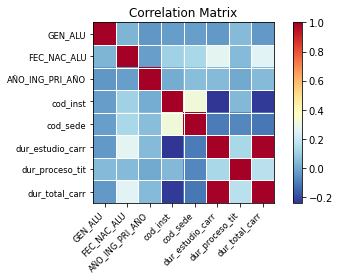

<Figure size 576x576 with 0 Axes>

In [58]:
## Matriz de correlación entre las columnas dentro del dataset concatenado con los años 2017 al 2020 ##

corr = df_allYears.set_index('FECHA_OBTENCION_TITULO').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns)) 
plt.figure(figsize=(8,8))
plt.show()

In [59]:
## Limpieza de los años ##

df_allYears['cat_periodo'] = df_allYears['cat_periodo'].str.strip("TIT_").astype(int) 
df_allYears



,cat_periodo,codigo_unico,MRUN,GEN_ALU,FEC_NAC_ALU,EDAD_ALU,rango_edad,AÑO_ING_PRI_AÑO,SEM_ING_PRI_AÑO,AÑO_ING_CARR,...,provincia_sede,comuna_sede,jornada,modalidad,version,tipo_plan_carr,AREA_CINEUNESCO,oecd_area,oecd_subarea,AREA_CARRERA_GENERICA_N
0,2017,I100S10C10J1V1,5073113,2,198304,34,30 A 34 AÑOS,2013,1,,...,MAGALLANES,PUNTA ARENAS,DIURNO,PRESENCIAL,1,PLAN REGULAR,TECNOLOGÍA,SERVICIOS,SERVICIOS DE SEGURIDAD,INGENIERÍA EN PREVENCIÓN DE RIESGOS
1,2017,I100S10C10J1V1,5428405,1,198211,34,30 A 34 AÑOS,2013,1,,...,MAGALLANES,PUNTA ARENAS,DIURNO,PRESENCIAL,1,PLAN REGULAR,TECNOLOGÍA,SERVICIOS,SERVICIOS DE SEGURIDAD,INGENIERÍA EN PREVENCIÓN DE RIESGOS
2,2017,I100S10C10J1V1,6006854,2,199410,22,20 A 24 AÑOS,2013,1,,...,MAGALLANES,PUNTA ARENAS,DIURNO,PRESENCIAL,1,PLAN REGULAR,TECNOLOGÍA,SERVICIOS,SERVICIOS DE SEGURIDAD,INGENIERÍA EN PREVENCIÓN DE RIESGOS
3,2017,I100S10C10J1V1,6553554,2,199101,26,25 A 29 AÑOS,2010,1,,...,MAGALLANES,PUNTA ARENAS,DIURNO,PRESENCIAL,1,PLAN REGULAR,TECNOLOGÍA,SERVICIOS,SERVICIOS DE SEGURIDAD,INGENIERÍA EN PREVENCIÓN DE RIESGOS
4,2017,I100S10C10J1V1,7147996,2,199310,23,20 A 24 AÑOS,9998,,2015,...,MAGALLANES,PUNTA ARENAS,DIURNO,PRESENCIAL,1,PLAN REGULAR,TECNOLOGÍA,SERVICIOS,SERVICIOS DE SEGURIDAD,INGENIERÍA EN PREVENCIÓN DE RIESGOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199029,2020,I9S9C7J2V1,18517171,2,199404,26,25 A 29 AÑOS,2016,1,2016,...,DIGUILLIN,CHILLAN,VESPERTINO,PRESENCIAL,1,PLAN REGULAR,CIENCIAS SOCIALES,"CIENCIAS SOCIALES, ENSEÑANZA COMERCIAL Y DERECHO",CIENCIAS SOCIALES Y DEL COMPORTAMIENTO,PSICOLOGÍA
199030,2020,I9S9C7J2V1,20926782,2,199108,28,25 A 29 AÑOS,2016,1,2016,...,DIGUILLIN,CHILLAN,VESPERTINO,PRESENCIAL,1,PLAN REGULAR,CIENCIAS SOCIALES,"CIENCIAS SOCIALES, ENSEÑANZA COMERCIAL Y DERECHO",CIENCIAS SOCIALES Y DEL COMPORTAMIENTO,PSICOLOGÍA
199031,2020,I9S9C7J2V1,22309258,2,199411,25,25 A 29 AÑOS,2016,1,2016,...,DIGUILLIN,CHILLAN,VESPERTINO,PRESENCIAL,1,PLAN REGULAR,CIENCIAS SOCIALES,"CIENCIAS SOCIALES, ENSEÑANZA COMERCIAL Y DERECHO",CIENCIAS SOCIALES Y DEL COMPORTAMIENTO,PSICOLOGÍA
199032,2020,I9S9C7J2V1,22662031,2,197204,48,40 Y MÁS AÑOS,2016,1,2016,...,DIGUILLIN,CHILLAN,VESPERTINO,PRESENCIAL,1,PLAN REGULAR,CIENCIAS SOCIALES,"CIENCIAS SOCIALES, ENSEÑANZA COMERCIAL Y DERECHO",CIENCIAS SOCIALES Y DEL COMPORTAMIENTO,PSICOLOGÍA


In [60]:
## Se recatan las columnas con los datos mas relevantes a analizar ##

df_bd = df_bd[["Año","Nombre Institución","Tipo Institución","Nombre de la Sede","Nombre Region","Mención o Especialidad","Tipo Programa",
               "Area Conocimiento","Tipo Carrera","Nombre del Campus","Duración (en semestres)","Valor de matrícula","Valor de arancel",
               "Matrícula primer año hombres","Matrícula primer año mujeres","Matrícula primer año extranjeros","Matrícula Primer Año",
               "Matrícula total hombres","Matrícula total mujeres","Matrícula total extranjeros", "Matrícula Total","Pregrado/Posgrado"]]


In [61]:
## Agrupamos por año a los hombres y mujeres en un dataframe por separado ##
df_men = df_allYears[df_allYears["GEN_ALU"] == 1].groupby(by = 'cat_periodo')['GEN_ALU'].sum()
df_women= df_allYears[df_allYears["GEN_ALU"] == 2].groupby(by = 'cat_periodo')['GEN_ALU'].sum()

## Generamos un array con enteros unicos  (años)##
anios = df_allYears['cat_periodo'].unique()


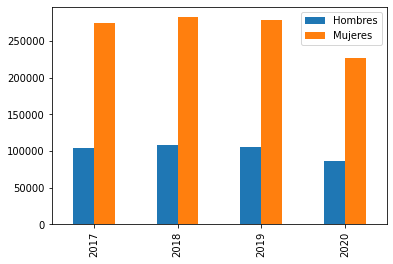

In [62]:
## Hombres y mujeres titulados de educación superior entre los años 2017 al 2020 ##

df_plot = pd.DataFrame({'Hombres': df_men,
                        'Mujeres': df_women}, 
                        index=anios)

df_plot.plot(kind='bar')

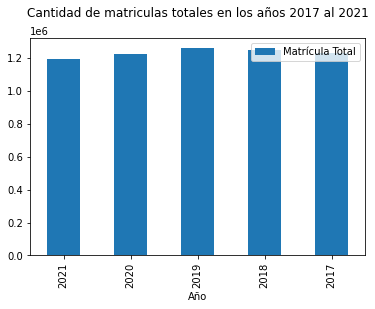

In [63]:
 ### Cantidad de matriculas totales en los años 2017 al 2021 ###

tot_matricu = df_bd.groupby(["Año"], sort = False)["Matrícula Total"].sum()

plt_tot_matricu = pd.DataFrame(tot_matricu)

plt_tot_matricu.plot(kind='bar', title = 'Cantidad de matriculas totales en los años 2017 al 2021\n')


In [64]:
df_bd_institution = df_bd.groupby(["Tipo Institución"], sort = False)[["Matrícula total hombres",
"Matrícula total mujeres","Matrícula total extranjeros","Matrícula Total"]].sum() 

df_bd_institution

,Matrícula total hombres,Matrícula total mujeres,Matrícula total extranjeros,Matrícula Total
Tipo Institución,,,,
Univ.,1651589.0,1964878.0,54790.0,3616467
I.P.,923013.0,949914.0,30955.0,1872927
C.F.T.,305340.0,357114.0,11274.0,662454
F.F.A.A.,12991.0,3155.0,103.0,16146


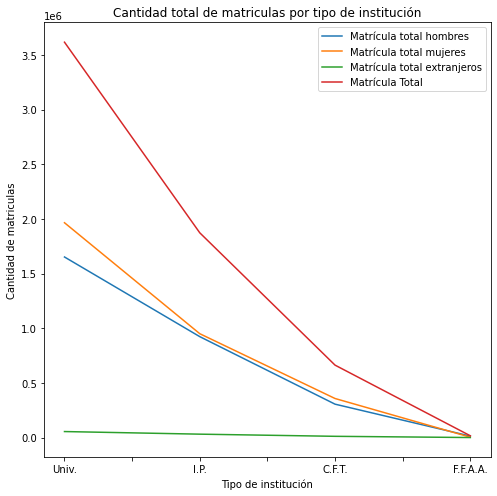

In [65]:
plt_institution = df_bd_institution.plot(kind = 'line', figsize = (8,8), xlabel = 'Tipo de institución', 
ylabel = 'Cantidad de matriculas', title = 'Cantidad total de matriculas por tipo de institución')

In [66]:
# df_age_2017 = df_allYears.groupby(['cat_periodo']).EDAD_ALU.mean()

# df_age_2017

In [67]:
## Mostrando los primeros 5 registros del csv obtenido de una base de datos del ministerio ##
df_bd.head()

,Año,Nombre Institución,Tipo Institución,Nombre de la Sede,Nombre Region,Mención o Especialidad,Tipo Programa,Area Conocimiento,Tipo Carrera,Nombre del Campus,...,Valor de arancel,Matrícula primer año hombres,Matrícula primer año mujeres,Matrícula primer año extranjeros,Matrícula Primer Año,Matrícula total hombres,Matrícula total mujeres,Matrícula total extranjeros,Matrícula Total,Pregrado/Posgrado
0,2021,U. DE CHILE,Univ.,Santiago,Región Metropolitana,NaN,Programa Regular,Administración y Comercio,Profesional con Licenciatura,Andrés Bello,...,4084400.0,67.0,69.0,0.0,136,288.0,387.0,3.0,675,Pregrado
1,2021,U. DE CHILE,Univ.,Santiago,Región Metropolitana,NaN,Programa Regular,Administración y Comercio,Profesional con Licenciatura,Andrés Bello,...,5156300.0,50.0,39.0,1.0,89,184.0,184.0,9.0,368,Pregrado
2,2021,U. DE CHILE,Univ.,Santiago,Región Metropolitana,Ciencias Económicas o Ciencias de la Administr...,Programa Regular,Administración y Comercio,Profesional con Licenciatura,Andrés Bello,...,5749600.0,278.0,243.0,2.0,521,1529.0,1059.0,30.0,2588,Pregrado
3,2021,U. DE CHILE,Univ.,Santiago,Región Metropolitana,NaN,Programa Regular,Administración y Comercio,Profesional con Licenciatura,Andrés Bello,...,5156300.0,98.0,66.0,4.0,164,388.0,354.0,13.0,742,Pregrado
4,2021,U. DE CHILE,Univ.,Santiago,Región Metropolitana,NaN,Programa Regular,"Agricultura, Silvicultura, Pesca y Veterinaria",Profesional con Licenciatura,Sur,...,4773000.0,44.0,28.0,0.0,72,395.0,285.0,1.0,680,Pregrado


In [68]:
df_bd = df_bd.rename(columns={'Valor de arancel':'Valor_arancel'})
df_bd.head()

,Año,Nombre Institución,Tipo Institución,Nombre de la Sede,Nombre Region,Mención o Especialidad,Tipo Programa,Area Conocimiento,Tipo Carrera,Nombre del Campus,...,Valor_arancel,Matrícula primer año hombres,Matrícula primer año mujeres,Matrícula primer año extranjeros,Matrícula Primer Año,Matrícula total hombres,Matrícula total mujeres,Matrícula total extranjeros,Matrícula Total,Pregrado/Posgrado
0,2021,U. DE CHILE,Univ.,Santiago,Región Metropolitana,NaN,Programa Regular,Administración y Comercio,Profesional con Licenciatura,Andrés Bello,...,4084400.0,67.0,69.0,0.0,136,288.0,387.0,3.0,675,Pregrado
1,2021,U. DE CHILE,Univ.,Santiago,Región Metropolitana,NaN,Programa Regular,Administración y Comercio,Profesional con Licenciatura,Andrés Bello,...,5156300.0,50.0,39.0,1.0,89,184.0,184.0,9.0,368,Pregrado
2,2021,U. DE CHILE,Univ.,Santiago,Región Metropolitana,Ciencias Económicas o Ciencias de la Administr...,Programa Regular,Administración y Comercio,Profesional con Licenciatura,Andrés Bello,...,5749600.0,278.0,243.0,2.0,521,1529.0,1059.0,30.0,2588,Pregrado
3,2021,U. DE CHILE,Univ.,Santiago,Región Metropolitana,NaN,Programa Regular,Administración y Comercio,Profesional con Licenciatura,Andrés Bello,...,5156300.0,98.0,66.0,4.0,164,388.0,354.0,13.0,742,Pregrado
4,2021,U. DE CHILE,Univ.,Santiago,Región Metropolitana,NaN,Programa Regular,"Agricultura, Silvicultura, Pesca y Veterinaria",Profesional con Licenciatura,Sur,...,4773000.0,44.0,28.0,0.0,72,395.0,285.0,1.0,680,Pregrado


In [69]:
## Renombramos las columnas VMATRICULA, VARANCEL y VTITULO ##
df_bd.rename(columns={'Valor de matrícula':'VMATRICULA', 'Valor de arancel': 'VARANCEL', 'Valor del Título': 'VTITULO'}, inplace=True)

In [70]:
## Promedio del valor de la matricula por tipo de institución ##

torta_0 = df_bd.groupby(['Tipo Institución']).VMATRICULA.mean()
torta = pd.DataFrame(torta_0)
torta.reset_index(drop=False, inplace=True)

fig = px.pie(torta, values='VMATRICULA',
             names='Tipo Institución',
             title = 'Promedio valor de matrícula por tipo de institución',
             color_discrete_sequence = px.colors.sequential.Plasma)
fig.show()

In [71]:
df_2018.head()

,cat_periodo,codigo_unico,MRUN,GEN_ALU,FEC_NAC_ALU,EDAD_ALU,rango_edad,AÑO_ING_PRI_AÑO,SEM_ING_PRI_AÑO,AÑO_ING_CARR,...,provincia_sede,comuna_sede,jornada,modalidad,version,tipo_plan_carr,AREA_CINEUNESCO,oecd_area,oecd_subarea,AREA_CARRERA_GENERICA_N
0,TIT_2018,I100S10C10J1V1,590763,2,199606,22,20 A 24 AÑOS,2014,1,2014,...,MAGALLANES,PUNTA ARENAS,DIURNO,PRESENCIAL,1,PLAN REGULAR,TECNOLOGÍA,SERVICIOS,SERVICIOS DE SEGURIDAD,INGENIERÍA EN PREVENCIÓN DE RIESGOS
1,TIT_2018,I100S10C10J1V1,1979973,2,198510,32,30 A 34 AÑOS,2014,1,2016,...,MAGALLANES,PUNTA ARENAS,DIURNO,PRESENCIAL,1,PLAN REGULAR,TECNOLOGÍA,SERVICIOS,SERVICIOS DE SEGURIDAD,INGENIERÍA EN PREVENCIÓN DE RIESGOS
2,TIT_2018,I100S10C10J1V1,2988701,1,199510,22,20 A 24 AÑOS,2015,1,2017,...,MAGALLANES,PUNTA ARENAS,DIURNO,PRESENCIAL,1,PLAN REGULAR,TECNOLOGÍA,SERVICIOS,SERVICIOS DE SEGURIDAD,INGENIERÍA EN PREVENCIÓN DE RIESGOS
3,TIT_2018,I100S10C10J1V1,7059325,1,199509,22,20 A 24 AÑOS,2014,1,2016,...,MAGALLANES,PUNTA ARENAS,DIURNO,PRESENCIAL,1,PLAN REGULAR,TECNOLOGÍA,SERVICIOS,SERVICIOS DE SEGURIDAD,INGENIERÍA EN PREVENCIÓN DE RIESGOS
4,TIT_2018,I100S10C10J1V1,8877808,2,199603,22,20 A 24 AÑOS,2014,1,2014,...,MAGALLANES,PUNTA ARENAS,DIURNO,PRESENCIAL,1,PLAN REGULAR,TECNOLOGÍA,SERVICIOS,SERVICIOS DE SEGURIDAD,INGENIERÍA EN PREVENCIÓN DE RIESGOS


In [72]:
df_2018.describe()

,GEN_ALU,FEC_NAC_ALU,AÑO_ING_PRI_AÑO,SEM_ING_PRI_AÑO,AÑO_ING_CARR,SEM_ING_CARR,FECHA_OBTENCION_TITULO,cod_inst,cod_sede,dur_estudio_carr,dur_proceso_tit,dur_total_carr
count,249290.000000,249290.000000,249290.000000,249290.000000,249290.000000,249290.000000,2.492900e+05,249290.000000,249290.000000,249290.000000,249290.000000,249290.000000
mean,1.566300,198882.615737,2013.767740,1.050054,2014.633102,1.067696,2.018211e+07,122.625653,7.851193,6.372967,0.493594,6.478154
std,0.495586,766.722418,8.004359,0.237415,2.476645,0.251224,3.278017e+03,119.892060,9.903108,2.954578,0.593960,2.974470
min,1.000000,190001.000000,1900.000000,0.000000,1970.000000,1.000000,2.018030e+07,1.000000,0.000000,1.000000,0.000000,1.000000
25%,1.000000,198603.000000,2013.000000,1.000000,2013.000000,1.000000,2.018060e+07,46.000000,1.000000,4.000000,0.000000,4.000000
50%,2.000000,199109.000000,2015.000000,1.000000,2015.000000,1.000000,2.018082e+07,89.000000,3.000000,5.000000,0.000000,5.000000
75%,2.000000,199407.000000,2016.000000,1.000000,2016.000000,1.000000,2.018120e+07,143.000000,10.000000,9.000000,1.000000,9.000000
max,2.000000,200212.000000,2018.000000,2.000000,2019.000000,2.000000,2.019023e+07,767.000000,50.000000,24.000000,10.000000,24.000000


In [73]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249290 entries, 0 to 249289
Data columns (total 40 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   cat_periodo              249290 non-null  object
 1   codigo_unico             249290 non-null  object
 2   MRUN                     249290 non-null  object
 3   GEN_ALU                  249290 non-null  int64 
 4   FEC_NAC_ALU              249290 non-null  int64 
 5   EDAD_ALU                 249290 non-null  object
 6   rango_edad               249290 non-null  object
 7   AÑO_ING_PRI_AÑO          249290 non-null  int64 
 8   SEM_ING_PRI_AÑO          249290 non-null  int64 
 9   AÑO_ING_CARR             249290 non-null  int64 
 10  SEM_ING_CARR             249290 non-null  int64 
 11  nomb_titulo_obtenido     249290 non-null  object
 12  nomb_grado_obtenido      249290 non-null  object
 13  FECHA_OBTENCION_TITULO   249290 non-null  int64 
 14  tipo_inst_1         

In [74]:
edad_alumno = pd.to_numeric(df_2018.EDAD_ALU, errors='coerce')

In [75]:
edad_alumno.min()

18.0

In [76]:
edad_alumno.max()

80.0

In [77]:
edad_alumno.mean()

28.719100131979573

In [78]:
##  Se cambia el nombre de la columna GEN_ALU  ##

df_2020.rename(columns={'GEN_ALU':'GENERO'}, inplace=True)
df_2019.rename(columns={'GEN_ALU':'GENERO'}, inplace=True)
df_2018.rename(columns={'GEN_ALU':'GENERO'}, inplace=True)
df_2017.rename(columns={'GEN_ALU':'GENERO'}, inplace=True)


In [79]:
##  Se cruzan los hombres y mujeres con el tipo de jornada y se agrupan en una tabla ##

prueba_2020 = pd.crosstab(df_2020.GENERO, df_2020.jornada)


prueba_2019 = pd.crosstab(df_2019.GENERO, df_2019.jornada)


prueba_2018 = pd.crosstab(df_2018.GENERO, df_2018.jornada)


prueba_2017 = pd.crosstab(df_2017.GENERO, df_2017.jornada)




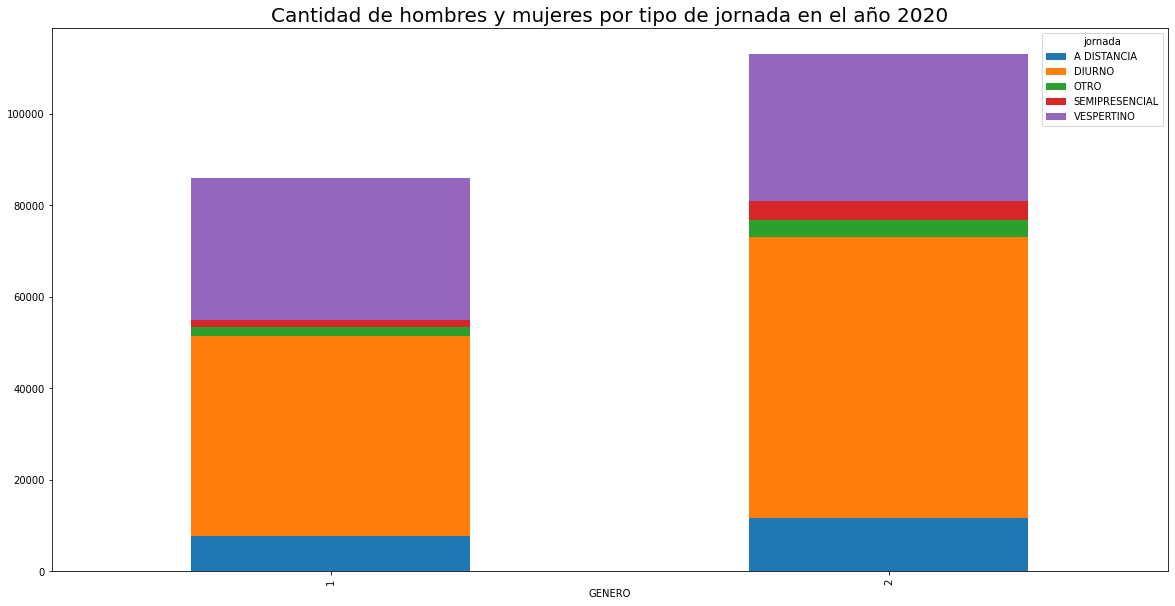

In [80]:
##  Cantidad de hombres vs mujeres por el tipo de jornada en el año 2020 ##

apilado = prueba_2020.plot(kind="bar", stacked=True, figsize=(20,10))
titulo_3 = "Cantidad de hombres y mujeres por tipo de jornada en el año 2020"
plt.title(titulo_3, fontsize=20)
plt.show()

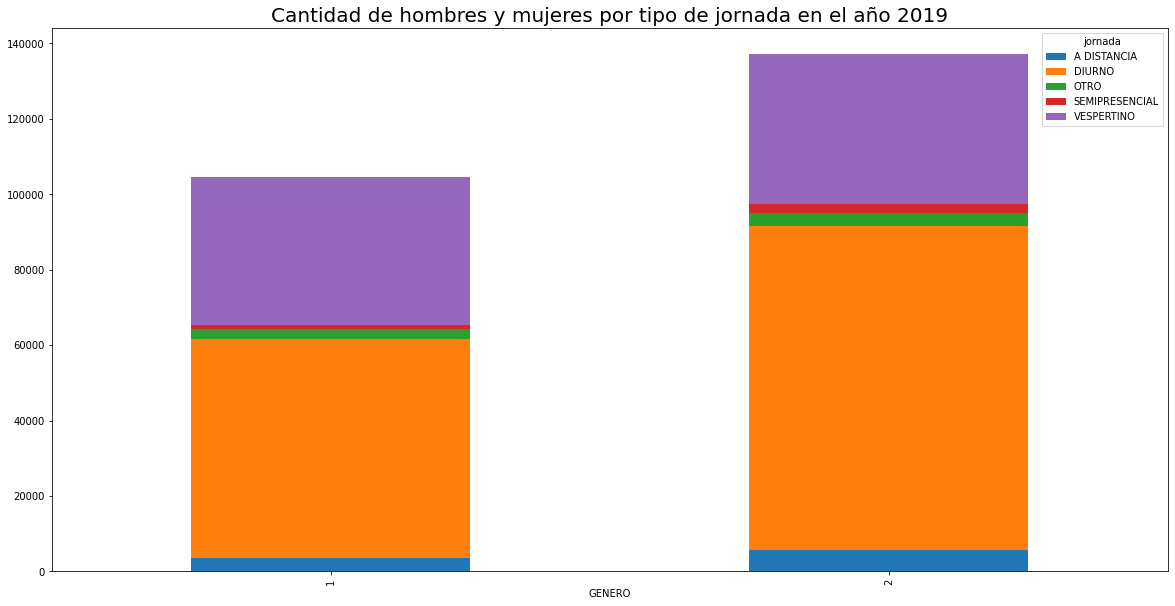

In [81]:
apilado2 = prueba_2017.plot(kind="bar", stacked=True, figsize=(20,10))
titulo_4 = "Cantidad de hombres y mujeres por tipo de jornada en el año 2019"
plt.title(titulo_4, fontsize=20)
plt.show()

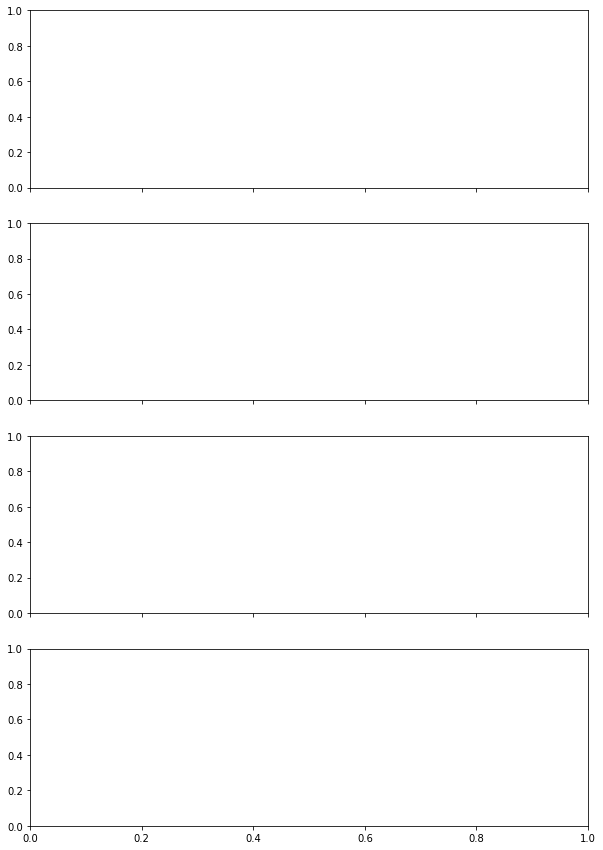

In [82]:

fig, axes = plt.subplots(nrows=4, ncols=1, figsize = (10,15), sharex = True, sharey = True) #separación eje y


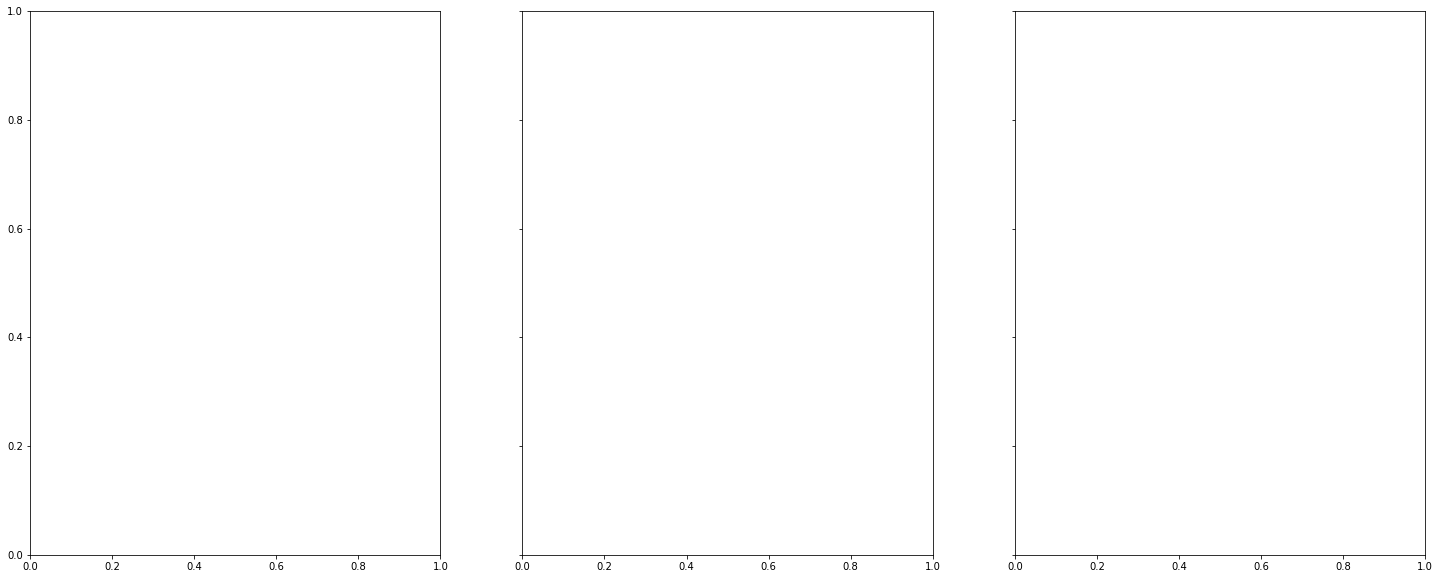

In [83]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize = (25,10), sharex = True, sharey = True) #separación en el eje x



In [84]:
df_allYears.head(3)

,cat_periodo,codigo_unico,MRUN,GEN_ALU,FEC_NAC_ALU,EDAD_ALU,rango_edad,AÑO_ING_PRI_AÑO,SEM_ING_PRI_AÑO,AÑO_ING_CARR,...,provincia_sede,comuna_sede,jornada,modalidad,version,tipo_plan_carr,AREA_CINEUNESCO,oecd_area,oecd_subarea,AREA_CARRERA_GENERICA_N
0,2017,I100S10C10J1V1,5073113,2,198304,34,30 A 34 AÑOS,2013,1,,...,MAGALLANES,PUNTA ARENAS,DIURNO,PRESENCIAL,1,PLAN REGULAR,TECNOLOGÍA,SERVICIOS,SERVICIOS DE SEGURIDAD,INGENIERÍA EN PREVENCIÓN DE RIESGOS
1,2017,I100S10C10J1V1,5428405,1,198211,34,30 A 34 AÑOS,2013,1,,...,MAGALLANES,PUNTA ARENAS,DIURNO,PRESENCIAL,1,PLAN REGULAR,TECNOLOGÍA,SERVICIOS,SERVICIOS DE SEGURIDAD,INGENIERÍA EN PREVENCIÓN DE RIESGOS
2,2017,I100S10C10J1V1,6006854,2,199410,22,20 A 24 AÑOS,2013,1,,...,MAGALLANES,PUNTA ARENAS,DIURNO,PRESENCIAL,1,PLAN REGULAR,TECNOLOGÍA,SERVICIOS,SERVICIOS DE SEGURIDAD,INGENIERÍA EN PREVENCIÓN DE RIESGOS


In [85]:

df_allYears['EDAD_ALU'] = pd.to_numeric(df_allYears['EDAD_ALU'],errors='coerce')

In [86]:
df_allYears["EDAD_ALU"] = df_allYears["EDAD_ALU"].fillna(df_allYears["EDAD_ALU"].mean())


In [87]:
df_allYears['EDAD_ALU'] = df_allYears['EDAD_ALU'].astype(int)

Text(0.5, 1.0, 'Edad del alumno por area de conocimiento')

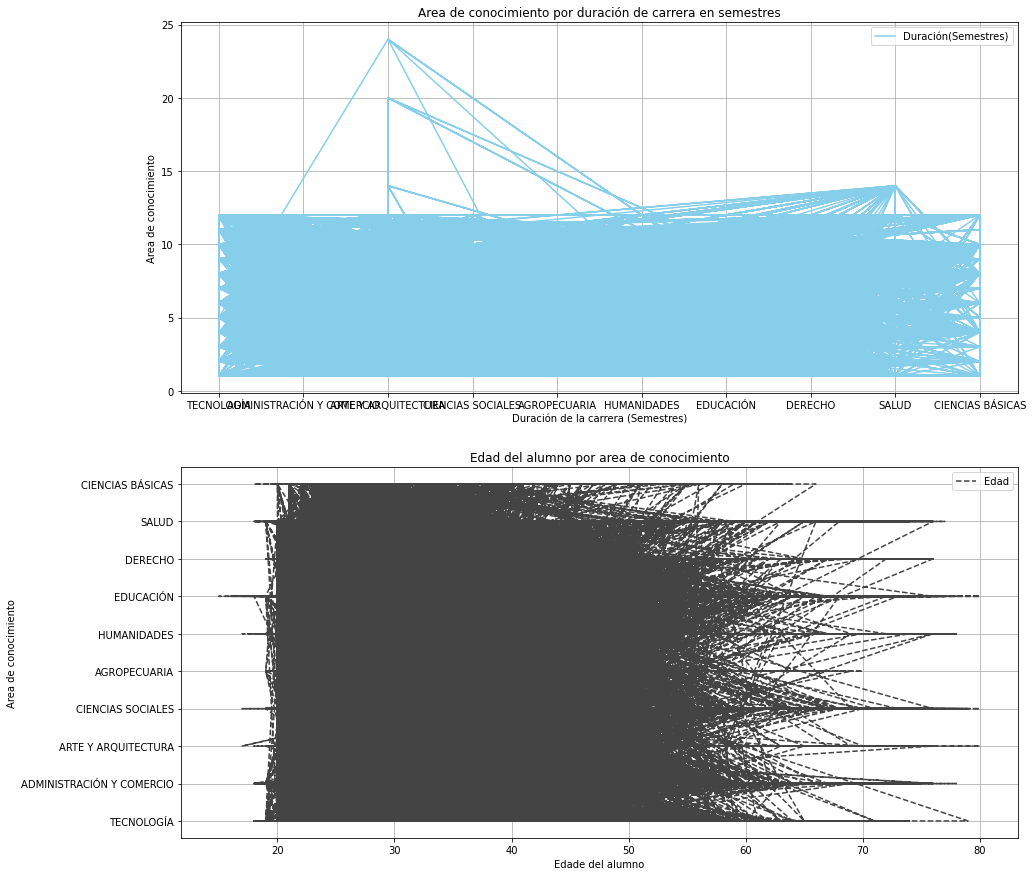

In [92]:
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(15,15))



ax[0].plot(df_allYears['AREA_CINEUNESCO'], df_allYears['dur_estudio_carr'] , color='skyblue', label='Duración(Semestres)')
ax[0].grid(True)
ax[0].legend() 
ax[0].set_xlabel('Duración de la carrera (Semestres)')
ax[0].set_ylabel('Area de conocimiento')
ax[0].set_title('Area de conocimiento por duración de carrera en semestres')


ax[1].plot(df_allYears['EDAD_ALU'], df_allYears['AREA_CINEUNESCO'], color='#444444', linestyle='--', label='Edad')
ax[1].grid(True)
ax[1].legend() 
ax[1].set_xlabel('Edade del alumno')
ax[1].set_ylabel('Area de conocimiento')
ax[1].set_title('Edad del alumno por area de conocimiento')





In [89]:
#Creamos archivo .db en el directorio del programa
connection = sqlite3.connect('PostgreSQL.db')
c = connection.cursor()

#Creamos la tabla donde se cargará el dataframe
c.execute('''
          CREATE TABLE IF NOT EXISTS graduates
          (   
            [cat_periodo] INTEGER,
            [codigo_unico] INTEGER PRIMARY KEY,
            [MRUN] INTEGER,
            [GEN_ALU] INTEGER,
            [FEC_NAC_ALU[ TEXT,
            [EDAD_ALU] INTEGER,
            [rango_edad] TXT,
            [AÑO_ING_PRI_AÑO] INTEGER,
            [SEM_ING_PRI_AÑO] INTEGER,	   
            [AÑO_ING_CARR] INTEGER, 
            [SEM_ING_CARR] INTEGER, 
            [nomb_titulo_obtenido] VARCHAR,	   
            [nomb_grado_obtenido] VARCHAR,
            [FECHA_OBTENCION_TITULO] VARCHAR, 
            [tipo_inst_1] VARCHAR,
            [tipo_inst_2] VARCHAR, 
            [tipo_inst_3] VARCHAR,
            [cod_inst] INTEGER,
            [nomb_inst] ,
            [cod_sede],
            [nomb_sede] VARCHAR,
            [cod_carrera],
            [nomb_carrera],
            [nivel_global],
            [nivel_carrera_1],
            [nivel_carrera_2], 
            [dur_estudio_carr],
            [dur_proceso_tit],
            [dur_total_carr],
            [region_sede] VARCHAR,
            [provincia_sede] VARCHAR,
            [comuna_sede] VARCHAR, 
            [jornada] VARCHAR,
            [modalidad] VARCHAR, 
            [version] INTEGER, 
            [tipo_plan_carr] VARCHAR,
            [AREA_CINEUNESCO] VARCHAR,
            [oecd_area] VARCHAR,
            [oecd_subarea] VARCHAR,
            [AREA_CARRERA_GENERICA_N] VARCHAR)''')

connection.commit()
#Ejemplo de dataframe creado en pandas en base a una colección del tipo diccionario

df_allYears.to_sql('graduates', connection, if_exists='replace', index = False)
#Consultamos la tabla creada en la base de datos .db para ver que proceso fue exitoso
df = pd.read_sql('SELECT * FROM graduates', connection)
print(df)

        cat_periodo    codigo_unico      MRUN  GEN_ALU  FEC_NAC_ALU  EDAD_ALU  \
0              2017  I100S10C10J1V1   5073113        2       198304        34   
1              2017  I100S10C10J1V1   5428405        1       198211        34   
2              2017  I100S10C10J1V1   6006854        2       199410        22   
3              2017  I100S10C10J1V1   6553554        2       199101        26   
4              2017  I100S10C10J1V1   7147996        2       199310        23   
...             ...             ...       ...      ...          ...       ...   
935592         2020      I9S9C7J2V1  18517171        2       199404        26   
935593         2020      I9S9C7J2V1  20926782        2       199108        28   
935594         2020      I9S9C7J2V1  22309258        2       199411        25   
935595         2020      I9S9C7J2V1  22662031        2       197204        48   
935596         2020      I9S9C7J2V1  23378583        2       198406        36   

           rango_edad  AÑO_